# Прогнозирование динамики фондовых рынков с помощью Random Forest

### Подготовка данных

In [ ]:
import pandas as pd
import numpy as np

In [5]:
import os
os.getcwd()

'/Users/shenker'

Импорт данных

In [256]:
data = pd.read_csv('IMOEX.csv', sep=';')

In [605]:
data[699:700]

,PRICE,DATE
699,2707.89,08.10.2019


Создание столбца RETURN

In [630]:
ret = [0]
for i in range(1, len(data['PRICE'])):
    r = (data['PRICE'][i] - data['PRICE'][i - 1]) / data['PRICE'][i-1]
    ret.append(r)

In [631]:
data['RETURN'] = ret

Создаем таблицу, в которой будут храниться переменные для модели

In [262]:
imoex = pd.DataFrame()

In [266]:
imoex.head()

,CLASS
0,1
1,-1
2,-1
3,-1
4,-1


Создание столбца CLASS

In [55]:
clas = [1]
for i in range(1, len(data['RETURN'])):
    if data['RETURN'][i] < 0:
        c = -1
    else:
        c = 1
    clas.append(c)

In [265]:
imoex['CLASS'] = clas

Создание переменной RSI

In [268]:
rsi = pd.DataFrame(data['PRICE'])

In [269]:
gain = [0]
loss = [0]
for i in range(1, len(data['PRICE'])):
    dif = data['PRICE'][i] - data['PRICE'][i - 1]
    if dif > 0:
        g = dif
        l = 0
    else:
        g = 0
        l = - dif
    gain.append(g)
    loss.append(l)

In [270]:
rsi['GAIN'] = gain
rsi['LOSS'] = loss

In [271]:
rsi

,PRICE,GAIN,LOSS
0,2285.43,0.00,0.00
1,2263.90,0.00,21.53
2,2220.35,0.00,43.55
3,2213.93,0.00,6.42
4,2211.25,0.00,2.68
...,...,...,...
814,2489.97,37.28,0.00
815,2401.11,0.00,88.86
816,2433.35,32.24,0.00
817,2508.81,75.46,0.00


In [272]:
avgain = [0] * 14
avloss = [0] * 14

for i in range(14, len(rsi['GAIN'])):
    ag = np.mean(rsi['GAIN'][i - 14 : i])
    avgain.append(ag)

for i in range(14, len(rsi['LOSS'])):
    al = np.mean(rsi['LOSS'][i - 14 : i])
    avloss.append(al)

In [273]:
rsi['AVERAGE GAIN'] = avgain
rsi['AVERAGE LOSS'] = avloss

In [274]:
rsi['RS'] = rsi['AVERAGE GAIN'] / rsi['AVERAGE LOSS']
rsi['RSI'] = 100 - (100 / (1 + rsi['RS']))

Добавляем переменную RSI в таблицу imoex

In [275]:
imoex['RSI'] = rsi['RSI']

Создаем переменные Stochastic Oscillator и Williams Percentage Range

In [276]:
so = pd.DataFrame(data['PRICE'])

In [417]:
so.head(15)

,PRICE,L14,H14,SCH,WPR
0,2285.43,0.00,0.00,inf,inf
1,2263.90,0.00,0.00,inf,inf
2,2220.35,0.00,0.00,inf,inf
3,2213.93,0.00,0.00,inf,inf
4,2211.25,0.00,0.00,inf,inf
5,2237.49,0.00,0.00,inf,inf
6,2218.61,0.00,0.00,inf,inf
7,2212.00,0.00,0.00,inf,inf
8,2195.19,0.00,0.00,inf,inf
9,2189.07,0.00,0.00,inf,inf


In [278]:
lowest = [0] * 14
highest = [0] * 14

for i in range(14, len(so['PRICE'])):
    l = min(so['PRICE'][i - 14 : i])
    lowest.append(l)
    
for i in range(14, len(so['PRICE'])):
    h = max(so['PRICE'][i - 14 : i])
    highest.append(h)

In [279]:
so['L14'] = lowest
so['H14'] = highest

In [280]:
so['SCH'] = 100 * ((so['PRICE'] - so['L14']) / (so['H14'] - so['L14']))
so['WPR'] = -100 * ((so['H14'] - so['PRICE']) / (so['H14'] - so['L14']))

Добавляем переменные Stochastic Oscillator и Williams Percentage Range в таблицу imoex

In [281]:
imoex['SCH'] = so['SCH']
imoex['WPR'] = so['WPR']

Добавляем переменную PROC

In [282]:
n = 20
proc = [0] * 20

for i in range(20, len(data['PRICE'])):
    pr = (data['PRICE'][i] - data['PRICE'][i - n]) / data['PRICE'][i - n]
    proc.append(pr)

imoex['PROC'] = proc

Рассчитываем индекс MACD

In [283]:
macd = pd.DataFrame(data['PRICE'])

In [418]:
macd.head()

,PRICE,EMA12,EMA26,MACD
0,2285.43,2285.430000,2285.430000,0.000000
1,2263.90,2273.767917,2274.250962,-0.483045
2,2220.35,2252.918891,2254.884869,-1.965978
3,2213.93,2240.611622,2243.435678,-2.824055
4,2211.25,2232.634174,2235.971686,-3.337512


In [285]:
exp1 = macd.ewm(span=12).mean()
exp2 = macd.ewm(span=26).mean()

macd['EMA12'] = exp1
macd['EMA26'] = exp2

macd['MACD'] = macd['EMA12'] - macd['EMA26']

Добавляем переменную MACD в таблицу imoex

In [286]:
imoex['MACD'] = macd['MACD']

Формируем окончательный датасет

In [287]:
imoex.head()

,CLASS,RSI,SCH,WPR,PROC,MACD
0,1,NaN,inf,inf,0.0,0.000000
1,-1,NaN,inf,inf,0.0,-0.483045
2,-1,NaN,inf,inf,0.0,-1.965978
3,-1,NaN,inf,inf,0.0,-2.824055
4,-1,NaN,inf,inf,0.0,-3.337512


In [288]:
imoex = imoex.drop(index = range(20))

In [289]:
imoex = imoex.reset_index().drop(columns=['index'])

In [535]:
imoex[678:680]

,CLASS,RSI,SCH,WPR,PROC,MACD
678,1,15.369583,20.785597,-79.214403,-0.024191,-8.645453
679,-1,26.677375,12.169774,-87.830226,-0.028567,-10.643008


### Построение модели

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Переводим данные в массив numpy, разделяя зависимую и независимые переменные

In [524]:
y = np.array(imoex['CLASS'])
x = np.array(imoex.drop(columns=['CLASS']))

Разделяем выборку на обучающую и тестовую выборки (train set и test set)

In [525]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [526]:
test_x.shape

(120, 5)

Создаем и обучаем модель

In [527]:
rf = RandomForestClassifier(max_depth=3, n_estimators=200, random_state = 42)

In [528]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Проверяем на тестовой выборке

In [529]:
predict = rf.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(accuracy)

0.8083333333333333


Сохраняем прогноз

In [530]:
predict = rf.predict(test_x)
predict

array([ 1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1])

Выбираем лучшие параметры

In [514]:
from sklearn.model_selection import GridSearchCV

In [515]:
params = {'max_depth': [3,5,7,10,20,30], 
          'n_estimators': [10, 100, 200, 500, 1000, 1500]}
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 3, n_jobs = -1)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [516]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 500}

Accuracy для разных горизонтов прогнозирования

In [406]:
sizes = [0.3, 0.25, 0.2, 0.18, 0.16, 0.15, 0.14, 0.11, 0.1, 0.05, 0.04, 0.02]
# accuracy = []
for size in sizes:
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = size, random_state = 42)
    rf = RandomForestClassifier(max_depth=3, n_estimators=200, random_state = 42)
    rf.fit(train_x, train_y)
    predict = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predict)
    print(size, accuracy)

0.3 0.725
0.25 0.73
0.2 0.7875
0.18 0.7916666666666666
0.16 0.7734375
0.15 0.8083333333333333
0.14 0.7946428571428571
0.11 0.7840909090909091
0.1 0.7875
0.05 0.65
0.04 0.71875
0.02 0.75


Сохраняем одно из деревьев

In [510]:
from sklearn.tree import export_graphviz
import pydot

tree4 = rf.estimators_[100]
data_list = list(imoex.drop(columns=['CLASS']).columns)
export_graphviz(tree4, out_file='tree4.dot', feature_names=data_list, class_names=True, filled=True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree4.dot')
graph.write_png('tree4.png')

In [443]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [413]:
# Accuracy с разными параметрами на train set

max_depth = [None, 3, 4, 5, 6, 7, 8, 9, 10]
n_est = [50, 100, 200, 300, 400, 500, 1000]

for depth in max_depth:
    for n in n_est:
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n, random_state = 42)
        rf.fit(train_x, train_y)
        predict = rf.predict(train_x)
        accuracy = accuracy_score(train_y, predict)
        print(depth, n, accuracy)

In [769]:
# Accuracy с разными параметрами на test set

max_depth = [None, 3, 4, 5, 6, 7, 8, 9, 10]
n_est = [50, 100, 200, 300, 400, 500, 1000]

for depth in max_depth:
    for n in n_est:
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n, random_state = 42)
        rf.fit(train_x, train_y)
        predict = rf.predict(test_x)
        accuracy = accuracy_score(test_y, predict)
        print(depth, n, accuracy)

None 50 0.75
None 100 0.775
None 200 0.7916666666666666
None 300 0.7833333333333333
None 400 0.7833333333333333
None 500 0.8
None 1000 0.7916666666666666
3 50 0.8
3 100 0.7916666666666666
3 200 0.8083333333333333
3 300 0.8083333333333333
3 400 0.8083333333333333
3 500 0.8
3 1000 0.8083333333333333
4 50 0.8
4 100 0.8
4 200 0.8
4 300 0.7916666666666666
4 400 0.8
4 500 0.8166666666666667
4 1000 0.8083333333333333
5 50 0.7916666666666666
5 100 0.8
5 200 0.775
5 300 0.775
5 400 0.775
5 500 0.7833333333333333
5 1000 0.7916666666666666
6 50 0.775
6 100 0.7916666666666666
6 200 0.7833333333333333
6 300 0.7916666666666666
6 400 0.7916666666666666
6 500 0.7916666666666666
6 1000 0.7833333333333333
7 50 0.775
7 100 0.7916666666666666
7 200 0.7916666666666666
7 300 0.8
7 400 0.8
7 500 0.8
7 1000 0.8
8 50 0.775
8 100 0.7916666666666666
8 200 0.775
8 300 0.7833333333333333
8 400 0.7833333333333333
8 500 0.7833333333333333
8 1000 0.7833333333333333
9 50 0.75
9 100 0.75
9 200 0.775
9 300 0.775
9 400 0

### Графики

In [475]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [496]:
x = train_x
y = train_y

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

#### Сравнение с ARIMA-GARCH

In [608]:
comp = pd.read_csv('to compare.csv', sep=';')

In [609]:
garch = []
for i in comp['return']:
    if i < 0:
        sign = -1
    else:
        sign = 1
    garch.append(sign)

garch = np.array(garch)
garch.shape

(120,)

Рассчитаем MSE и accuracy для обеих моделей

In [610]:
dif_rf = []
dif_ts = []

for i in range(len(test_y)):
    dif1 = (test_y[i] - predict[i])**2
    dif2 = (test_y[i] - garch[i])**2
    dif_rf.append(dif1)
    dif_ts.append(dif2)

mse_rf = sum(dif_rf)
mse_ts = sum(dif_ts)

print('MSE RF:', mse_rf, 'MSE TS:', mse_ts)

MSE RF: 92 MSE TS: 280


In [612]:
garch = np.array(garch)
accuracy_score(test_y, garch)

0.4166666666666667

In [613]:
garch.shape

(120,)

In [614]:
test_y.shape

(120,)

График

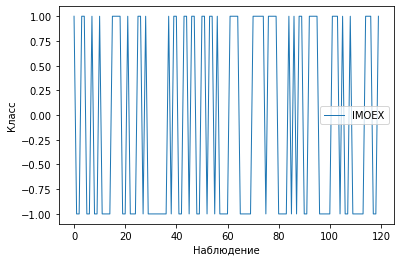

In [742]:
n = 120
xaxis = range(n)

plt.plot(xaxis, test_y[:n], label = 'IMOEX', linewidth = 1)
plt.xlabel('Наблюдение')
plt.ylabel('Класс')
plt.legend()

plt.savefig('1')

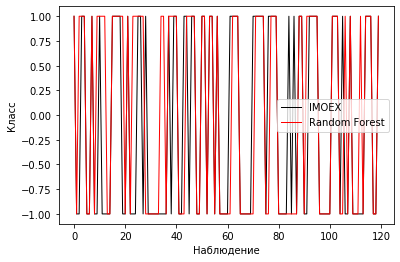

In [764]:
plt.plot(xaxis, test_y[:n], label = 'IMOEX', color = 'k', linewidth = 1)
plt.plot(predict[:n], label = 'Random Forest', color = 'r', linewidth = 1)
plt.xlabel('Наблюдение')
plt.ylabel('Класс')
plt.legend()

plt.savefig('2')

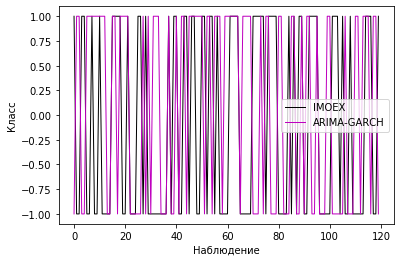

In [768]:
plt.plot(xaxis, test_y[:n], label = 'IMOEX', color = 'k', linewidth = 1) 
plt.plot(xaxis, garch[:n], label = 'ARIMA-GARCH', color = 'm', linewidth = 1)
plt.xlabel('Наблюдение')
plt.ylabel('Класс')
plt.legend()

plt.savefig('3')

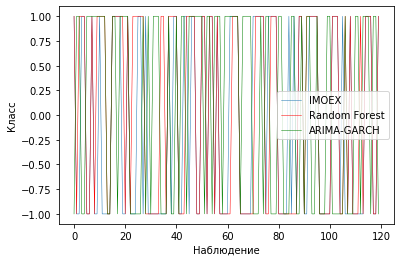

In [757]:
plt.plot(xaxis, test_y[:n], label = 'IMOEX', linewidth = 0.5)
plt.plot(xaxis, predict[:n], label = 'Random Forest', color = 'r', linewidth = 0.5)
plt.plot(xaxis, garch[:n], label = 'ARIMA-GARCH', color = 'g', linewidth = 0.5)

plt.xlabel('Наблюдение')
plt.ylabel('Класс')
plt.legend()

# plt.savefig('4')

In [644]:
data

,PRICE,DATE,RETURN
0,2285.43,03.01.2017,0.000000
1,2263.90,04.01.2017,-0.009421
2,2220.35,05.01.2017,-0.019237
3,2213.93,06.01.2017,-0.002891
4,2211.25,09.01.2017,-0.001211
...,...,...,...
814,2489.97,26.03.2020,0.015200
815,2401.11,27.03.2020,-0.035687
816,2433.35,30.03.2020,0.013427
817,2508.81,31.03.2020,0.031011


In [647]:
dtest = data.drop(range(699))

In [648]:
dtest['RF'] = predict
dtest['TS'] = garch

In [772]:
dtest['sumtev_rf'] = sr_rf
dtest.tail()

,PRICE,DATE,RETURN,RF,TS,rev_rf,rev_ts,sumtev_rf
814,2489.97,26.03.2020,0.015200,1,1,0.015200,0.015200,0.030630
815,2401.11,27.03.2020,-0.035687,1,-1,-0.035687,0.035687,-0.021030
816,2433.35,30.03.2020,0.013427,-1,1,-0.013427,0.013427,-0.048635
817,2508.81,31.03.2020,0.031011,-1,1,-0.031011,0.031011,-0.044021
818,2473.61,01.04.2020,-0.014031,1,-1,-0.014031,0.014031,-0.044606


In [650]:
dtest['rev_rf'] = dtest['RETURN'] * dtest['RF']
dtest['rev_ts'] = dtest['RETURN'] * dtest['TS']

In [657]:
# sumrev_rf = []
# sumrev_ts = []

def sumret(rev):
    prev = 0
    sumrev = []
    for i in rev:
        cur = (1 + prev) * (1 + i) - 1
        sumrev.append(cur)
        prev = i
    return sumrev

sr_rf = sumret(dtest['rev_rf'])
sr_ts = sumret(dtest['rev_ts'])
bh = sumret(dtest['RETURN'])

sr_rf

[-0.004166636020623504,
 -0.006053206434198044,
 0.0012289616003304804,
 -0.0018245350200144506,
 -0.008837005926856767,
 -0.010490866188835657,
 -0.017241626784917585,
 -0.009167058644878656,
 7.287700183988832e-06,
 0.0014350508264739936,
 0.017915587505584973,
 0.02188580844937782,
 0.026700163798117904,
 0.020949255381736753,
 0.007014756083136842,
 0.016152084574512227,
 0.018985547322107,
 0.002598320445663882,
 0.006612507084829078,
 0.019201929522664418,
 -0.004142779142779163,
 -0.0014142957661605893,
 0.021151755880892464,
 0.007758271553056195,
 -0.0074095500119401025,
 -0.009309597293227001,
 -0.009728377993738047,
 0.0003169852993807343,
 0.0077708771749733785,
 -0.0023823259368905836,
 -0.004120759229602866,
 -0.00031675462833768986,
 -0.0038103010662360326,
 -0.004313758788957678,
 -0.010928015483012476,
 -0.008889054315607159,
 -3.07102251400071e-05,
 0.0031709552257837004,
 -0.002182697595617067,
 -0.017677498918364565,
 -0.007024558568797579,
 0.006433198773703852,
 -

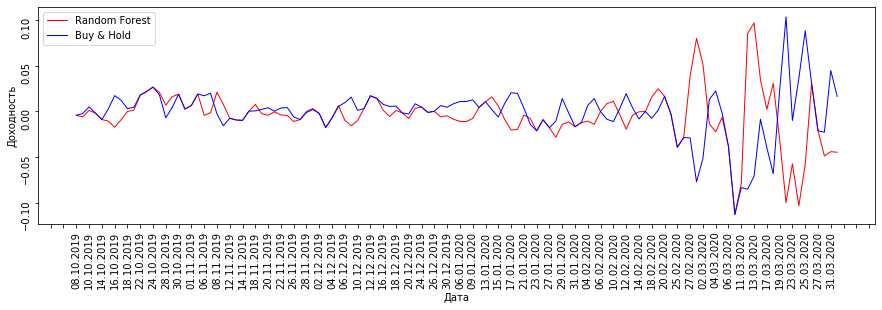

In [731]:
fig, ax = plt.subplots()

ax.plot(data['DATE'][699:], sr_rf, label = 'Random Forest', color = 'r', linewidth = 1)
ax.plot(data['DATE'][699:], bh, label = 'Buy & Hold', color = 'b', linewidth = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.tick_params(labelrotation = 90)
fig.set_figwidth(15)
plt.xlabel('Дата')
plt.ylabel('Доходность')
ax.legend()

fig.savefig('RF')

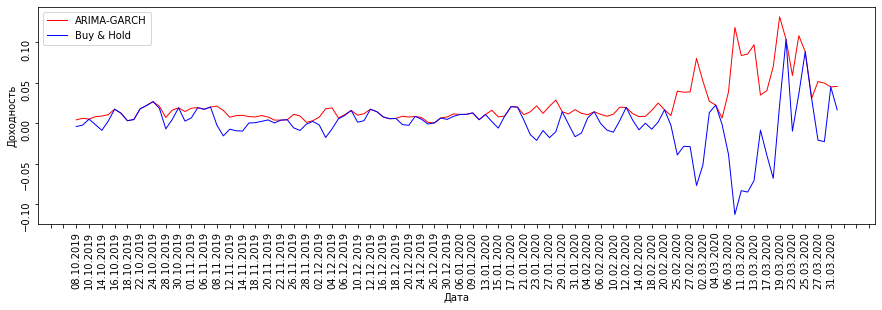

In [734]:
fig, ax = plt.subplots()

ax.plot(data['DATE'][699:], sr_ts,label = 'ARIMA-GARCH', color = 'r', linewidth = 1)
ax.plot(data['DATE'][699:], bh, label = 'Buy & Hold', color = 'b', linewidth = 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.tick_params(labelrotation = 90)
fig.set_figwidth(15)
plt.xlabel('Дата')
plt.ylabel('Доходность')
ax.legend()

fig.savefig('TS.png')